In this program we get informations of the craters which are created in astro_workplace. With those informations and the calculation of a the diameter of a specific crater done in pixel_converter. We can now calculate the real diameter and depth of the craters. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 10, 10
from matplotlib.pyplot import imshow
from numpy.linalg import norm
import rawpy
import PIL
from uncertainties import unumpy as unp
from uncertainties import ufloat
from uncertainties.umath import *
import os

#dummyvalues
r_mond=1737000. #r_mond in meter
pixerr=10

import import_ipynb
from Diameter_Depth_functions import betafinder, diameter_depth, arccosunc

importing Jupyter notebook from Diameter_Depth_functions.ipynb
rad:  0.266405305489
deg:  15.2638996444


Phase angle of the Moon (phi from proposal) with http://www.mondkalender-online.de/mondkalender/wunschkinder/mondwinkel-rechner.php.

Time Tim 01: 15.01.2019 22:00 -> websiteangle= 108°

Time Noa: 16.01.2019 21:00 -> websiteangle= 120°

Time Jennifer: 16.01.2019 01:10 -> websiteangle= 109°

Time Jennifer: 16.01.2019 18:35 -> websiteangle= 118°

In [2]:
degtorad=np.pi/180.
websiteangle=118. # This value has to be changed for each folder!!!!
phi=(180.-websiteangle)*degtorad

We write down the data of the day we file we want to work with down. We get the datas from the workfile script. Since the reference crater can also be in an other file with the same magnification, we call the file with the reference value dia_pix_ref.

In [3]:
"""
coord_unsere = [(ufloat(333.2722608829526,70.30793831363748),ufloat(-2770.268124846487,61.37808338996938)),(ufloat(284.9174576257754,70.13248196183868),ufloat(-2741.514190903561,61.34021088982898)),(ufloat(733.4608502893456,68.55458847642602),ufloat(-2471.522113543583,61.916413500554185)),(ufloat(168.60698179717,69.32980913226979),ufloat(-2606.8975858176073,61.27332215081018)),(ufloat(221.24808150234435,69.56006765518235),ufloat(-2646.054725582262,61.29935407984111)),(ufloat(204.10289571035503,69.31545791957608),ufloat(-2604.4419022953443,61.2901047899727)),(ufloat(230.40114613101866,68.83180584466086),ufloat(-2520.5911851249816,61.3045965410294)),(ufloat(31.534693188953067,69.80794406912914),ufloat(-2687.712147733027,61.2385059754388)),(ufloat(280.6311611777782,70.06934537380592),ufloat(-2731.110985081832,61.33713861789285)),(ufloat(373.0544712441348,70.35667916305614),ufloat(-2778.2156471459534,61.41366267899533)),(ufloat(197.89678860892826,67.12843742465263),ufloat(-2205.414256354311,61.28694027089552)),(ufloat(-103.17110962469648,68.10535178130517),ufloat(-2390.3054753508713,61.25075478918851)),(ufloat(-165.63494341891976,67.14760834450136),ufloat(-2209.1646799334753,61.27206180341489)),(ufloat(-60.397342872418655,66.50613428107891),ufloat(-2080.620385357405,61.24187425739427)),(ufloat(69.35249403285869,66.60163652966199),ufloat(-2100.1766558078093,61.24334917558019)),(ufloat(110.92071845592876,65.5537192962411),ufloat(-1876.1728959104405,61.25286052001092)),(ufloat(-26.77664074881514,65.64414488424475),ufloat(-1896.3988358212198,61.238153766190955)),(ufloat(-88.57080508266425,66.03943386102594),ufloat(-1982.7052365138445,61.24720156983614)),(ufloat(-246.4941041981872,65.50516573534601),ufloat(-1865.2338172198788,61.31432789482265)),(ufloat(-457.0139041550366,65.73015221244741),ufloat(-1915.4638322666385,61.501818027842184)),(ufloat(-70.8005486941481,66.52700148329949),ufloat(-2084.906681805403,61.24360678962269)),(ufloat(158.20377597544072,69.3548838710757),ufloat(-2611.1838822656046,61.26900845728405)),(ufloat(225.53437795034156,69.62169003629111),ufloat(-2656.4579314039916,61.30178267826896)),(ufloat(25.41778381522056,69.8960627607912),ufloat(-2702.4016500027533,61.23806372982223)),(ufloat(-109.28801899842814,68.18570946661983),ufloat(-2404.9949776205985,61.252404212171655)),(ufloat(-130.1390295057339,67.13505264288689),ufloat(-2206.7089964112133,61.25873994143532)),(ufloat(-46.91338293189909,66.96094579102873),ufloat(-2172.4186248272354,61.24003746311856)),(ufloat(-70.8005486941481,66.52700148329949),ufloat(-2084.906681805403,61.24360678962269)),(ufloat(189.41339344062897,69.27975612321174),ufloat(-2598.3249929216126,61.282772370500076)),(ufloat(235.93758377207084,69.59627789723338),ufloat(-2652.1716349559947,61.307870469263015)),(ufloat(229.19560380181136,69.32615516798563),ufloat(-2606.272515221079,61.30389393680764)),(ufloat(296.48160691286455,68.4048277847501),ufloat(-2444.687990254086,61.34873118193664)),(ufloat(31.534693188953067,69.80794406912914),ufloat(-2687.712147733027,61.2385059754388)),(ufloat(274.51425180404567,70.15854854174677),ufloat(-2745.800487351558,61.332834616343014)),(ufloat(387.74397351386125,70.39426518854732),ufloat(-2784.332556519686,61.42780769940059)),(ufloat(776.7258910466089,64.41232262872354),ufloat(-1601.8499232386177,61.99839511140304)),(ufloat(850.7984729917694,64.77386693812238),ufloat(-1693.0230921119198,62.14937459914162)),(ufloat(659.8795423491703,65.30860295689337),ufloat(-1820.3618443587825,61.78755502592932)),(ufloat(573.6177405203929,65.95907891389207),ufloat(-1965.4262541303128,61.653535258078776)),(ufloat(668.4967341090123,66.34865109389168),ufloat(-2048.026830107621,61.801955511747565)),(ufloat(623.222684970625,66.67629176000285),ufloat(-2115.357432082522,61.7283490567443))]

diameter_pix = [ufloat(308.52804325627562,10),ufloat(366.13909238701234,10),ufloat(273.51783824019248,10),ufloat(1008.0851890112514,10),ufloat(221.91380150086675,10),ufloat(120.14197779420743,10),ufloat(248.96124461759109,10),ufloat(469.14428591784599,10),ufloat(277.79582441504584,10),ufloat(344.91065034609284,10),ufloat(608.27904628366309,10),ufloat(847.02976299942861,10),ufloat(665.10341546817324,10),ufloat(495.2628308202539,10),ufloat(274.20680114082415,10),ufloat(712.69151333082254,10),ufloat(694.99877989696688,10),ufloat(239.89101345208388,10),ufloat(326.50383252495817,10),ufloat(547.03567648038415,10),ufloat(534.56275721825875,10),ufloat(1131.2509599055379,10),ufloat(285.6650539511395,10),ufloat(431.10412138547906,10),ufloat(846.3054962889629,10),ufloat(734.91448478579525,10),ufloat(258.07825419077898,10),ufloat(422.14829605313111,10),ufloat(1084.7621491453881,10),ufloat(258.07825419077892,10),ufloat(150.78480648528674,10),ufloat(310.9646303050053,10),ufloat(483.01555821702982,10),ufloat(291.54893355244377,10),ufloat(301.25661899628665,10),ufloat(621.17034725763835,10),ufloat(710.63678346430061,10),ufloat(1136.4096774193549,10),ufloat(264.21953356001524,10),ufloat(496.87932127061566,10),ufloat(362.64396006136678,10)]

shadow_pix = [ufloat(347.49938994848361,10),ufloat(200.00091841620559,10),ufloat(129.58629192607842,10),ufloat(355.68328024813735,10),ufloat(195.46840684602171,10),ufloat(113.68661751992488,10),ufloat(219.13308499312819,10),ufloat(647.34878733661151,10),ufloat(300.00137762430819,10),ufloat(364.97776723017051,10),ufloat(249.71796747097619,10),ufloat(282.34325433314206,10),ufloat(233.9176856564105,10),ufloat(144.39268709089055,10),ufloat(132.1097667800081,10),ufloat(129.58629192607873,10),ufloat(126.64076414235547,10),ufloat(200.00091841620483,10),ufloat(286.81859506040456,10),ufloat(304.06196620492307,10),ufloat(139.06761039201652,10),ufloat(288.78537418178058,10),ufloat(186.83142390223313,10),ufloat(546.86319163407256,10),ufloat(291.38709677419354,10),ufloat(240.48018588293121,10),ufloat(209.22233850686453,10),ufloat(165.9741630783941,10),ufloat(312.77961437666448,10),ufloat(169.90641440689552,10),ufloat(120.14197779420743,10),ufloat(138.04629220998308,10),ufloat(611.60447936386072,10),ufloat(307.14896886345082,10),ufloat(331.52174856421095,10),ufloat(82.987081539197263,10),ufloat(185.56475557596232,10),ufloat(126.64076414235649,10),ufloat(116.95884282820541,10),ufloat(166.25812250427748,10),ufloat(153.57448443172547,10)]

coord_pix = [(ufloat(1872.3158862621754,30),ufloat(5819.0505783279214,30)),(ufloat(1838.5610161323052,30),ufloat(5774.0440848214275,30)),(ufloat(2356.1356914569801,30),ufloat(5695.2827211850645,30)),(ufloat(1782.3028992491882,30),ufloat(5605.2697341720777,30)),(ufloat(1816.0577693790583,30),ufloat(5661.5278510551943,30)),(ufloat(1816.0577693790583,30),ufloat(5616.5213575487005,30)),(ufloat(1872.3158862621754,30),ufloat(5549.0116172889602,30)),(ufloat(1624.7801719764611,30),ufloat(5627.7729809253242,30)),(ufloat(1838.5610161323052,30),ufloat(5762.7924614448048,30)),(ufloat(1906.0707563920455,30),ufloat(5841.5538250811678,30)),(ufloat(1962.3288732751621,30),ufloat(5245.2177861201289,30)),(ufloat(1613.5285485998374,30),ufloat(5301.4759030032455,30)),(ufloat(1624.7801719764611,30),ufloat(5110.1983056006484,30)),(ufloat(1771.0512758725649,30),ufloat(5031.4369419642844,30)),(ufloat(1883.5675096387986,30),ufloat(5098.9466822240247,30)),(ufloat(2007.3353667816559,30),ufloat(4907.6690848214275,30)),(ufloat(1872.3158862621754,30),ufloat(4873.9142146915583,30)),(ufloat(1782.3028992491882,30),ufloat(4930.1723315746749,30)),(ufloat(1681.0382888595777,30),ufloat(4761.3979809253242,30)),(ufloat(1467.2574447037337,30),ufloat(4727.643110795454,30)),(ufloat(1759.7996524959412,30),ufloat(5031.4369419642844,30)),(ufloat(1771.0512758725649,30),ufloat(5605.2697341720777,30)),(ufloat(1816.0577693790583,30),ufloat(5672.779474431818,30)),(ufloat(1613.5285485998374,30),ufloat(5639.024604301947,30)),(ufloat(1602.2769252232142,30),ufloat(5312.7275263798692,30)),(ufloat(1658.5350421063313,30),ufloat(5121.4499289772721,30)),(ufloat(1748.548029119318,30),ufloat(5121.4499289772721,30)),(ufloat(1759.7996524959412,30),ufloat(5031.4369419642844,30)),(ufloat(1804.8061460024351,30),ufloat(5605.2697341720777,30)),(ufloat(1827.3093927556815,30),ufloat(5672.779474431818,30)),(ufloat(1838.5610161323052,30),ufloat(5627.7729809253242,30)),(ufloat(1962.3288732751621,30),ufloat(5504.0051237824664,30)),(ufloat(1624.7801719764611,30),ufloat(5627.7729809253242,30)),(ufloat(1827.3093927556815,30),ufloat(5774.0440848214275,30)),(ufloat(1917.3223797686687,30),ufloat(5852.8054484577915,30)),(ufloat(2727.4392628855521,30),ufloat(4907.6690848214275,30)),(ufloat(2761.1941330154223,30),ufloat(5020.1853185876616,30)),(ufloat(2536.161665482954,30),ufloat(5065.1918120941555,30)),(ufloat(2401.1421849634739,30),ufloat(5166.456422483765,30)),(ufloat(2457.4003018465905,30),ufloat(5278.97265625,30)),(ufloat(2389.8905615868503,30),ufloat(5323.9791497564929,30))]
"""
dia_pix_ref = [ufloat(591.83007172130192,10),ufloat(331.95154372960189,10),ufloat(464.53881506007599,10),ufloat(902.1481552499647,10),ufloat(406.9671177321913,10),ufloat(1261.0627574091914,10),ufloat(334.67544140471455,10),ufloat(441.76154469986574,10),ufloat(343.83088795164036,10),ufloat(406.61471433136541,10),ufloat(940.98510905866465,10),ufloat(309.14344268724028,10),ufloat(674.04614264610257,10),ufloat(280.11193754729891,10),ufloat(360.52010858323189,10),ufloat(211.48665370952122,10),ufloat(293.27922077922102,10),ufloat(629.62130166731208,10),ufloat(276.50630105879156,10)]

coord_unsere_ref = [(ufloat(204.01369798266037,67.05361083221085),ufloat(-2190.7247540845838,61.29005861679803)),(ufloat(-256.89731001991606,65.52416109738039),ufloat(-1869.520113667876,61.3209673035)),(ufloat(-486.9733804271699,66.3557232387912),ufloat(-2049.499965619912,61.537555854398406)),(ufloat(534.2822053003488,63.01117525008753),ufloat(-1190.6330574139672,61.59856051861237)),(ufloat(414.3105036202735,62.77146651284267),ufloat(-1106.2018685109254,61.45476772402164)),(ufloat(494.4553960753185,62.43439038605101),ufloat(-975.8269610091207,61.54683154639259)),(ufloat(-91.65087269878993,62.369613904421406),ufloat(948.8107148746608,61.24790613379379)),(ufloat(-521.4860598277207,65.67586728745518),ufloat(1903.4499669515012,61.58150836574297)),(ufloat(-520.90558809504,66.3567795502874),ufloat(2049.71991905224,61.58074451894587)),(ufloat(-651.2358967329973,65.76438420621895),ufloat(1923.0062374019053,61.773294718589106)),(ufloat(39.70658281298578,66.0671728161431),ufloat(1988.6400230426132,61.23924501700668)),(ufloat(253.75381202976357,69.9395662737919),ufloat(2709.6311765884248,61.318932241808525)),(ufloat(131.37102569127268,69.42241010267136),ufloat(2622.699705299273,61.25914879721265)),(ufloat(-0.20942413973871352,69.38991677455718),ufloat(2617.16326765822,61.237243625256966)),(ufloat(111.81475524086908,68.67511246728641),ufloat(2492.9498683939955,61.253113251524866)),(ufloat(234.24214044320658,68.01131821258421),ufloat(2373.0227655777676,61.306859643235676)),(ufloat(10.193781681990142,69.41506835792948),ufloat(2621.449564106217,61.237375485267414)),(ufloat(-274.9790719526998,68.80638241452068),ufloat(2516.1227658320217,61.333158355382864)),(ufloat(-189.8782135892828,67.9875992945002),ufloat(2368.647271402075,61.28299601636535))]

coord_unsere = [(ufloat(204.01369798266037,67.05361083221085),ufloat(-2190.7247540845838,61.29005861679803)),(ufloat(-256.89731001991606,65.52416109738039),ufloat(-1869.520113667876,61.3209673035)),(ufloat(-486.9733804271699,66.3557232387912),ufloat(-2049.499965619912,61.537555854398406)),(ufloat(534.2822053003488,63.01117525008753),ufloat(-1190.6330574139672,61.59856051861237)),(ufloat(414.3105036202735,62.77146651284267),ufloat(-1106.2018685109254,61.45476772402164)),(ufloat(494.4553960753185,62.43439038605101),ufloat(-975.8269610091207,61.54683154639259)),(ufloat(-91.65087269878993,62.369613904421406),ufloat(948.8107148746608,61.24790613379379)),(ufloat(-521.4860598277207,65.67586728745518),ufloat(1903.4499669515012,61.58150836574297)),(ufloat(-520.90558809504,66.3567795502874),ufloat(2049.71991905224,61.58074451894587)),(ufloat(-651.2358967329973,65.76438420621895),ufloat(1923.0062374019053,61.773294718589106)),(ufloat(39.70658281298578,66.0671728161431),ufloat(1988.6400230426132,61.23924501700668)),(ufloat(253.75381202976357,69.9395662737919),ufloat(2709.6311765884248,61.318932241808525)),(ufloat(131.37102569127268,69.42241010267136),ufloat(2622.699705299273,61.25914879721265)),(ufloat(-0.20942413973871352,69.38991677455718),ufloat(2617.16326765822,61.237243625256966)),(ufloat(111.81475524086908,68.67511246728641),ufloat(2492.9498683939955,61.253113251524866)),(ufloat(234.24214044320658,68.01131821258421),ufloat(2373.0227655777676,61.306859643235676)),(ufloat(10.193781681990142,69.41506835792948),ufloat(2621.449564106217,61.237375485267414)),(ufloat(-274.9790719526998,68.80638241452068),ufloat(2516.1227658320217,61.333158355382864)),(ufloat(-189.8782135892828,67.9875992945002),ufloat(2368.647271402075,61.28299601636535))]

diameter_pix = [ufloat(591.83007172130192,10),ufloat(331.95154372960189,10),ufloat(464.53881506007599,10),ufloat(902.1481552499647,10),ufloat(406.9671177321913,10),ufloat(1261.0627574091914,10),ufloat(334.67544140471455,10),ufloat(441.76154469986574,10),ufloat(343.83088795164036,10),ufloat(406.61471433136541,10),ufloat(940.98510905866465,10),ufloat(309.14344268724028,10),ufloat(674.04614264610257,10),ufloat(280.11193754729891,10),ufloat(360.52010858323189,10),ufloat(211.48665370952122,10),ufloat(293.27922077922102,10),ufloat(629.62130166731208,10),ufloat(276.50630105879156,10)]

shadow_pix = [ufloat(119.33097064601999,10),ufloat(168.75947709874717,10),ufloat(562.0122358608354,10),ufloat(135.81217159816006,10),ufloat(170.730046528835,10),ufloat(211.03427532260622,10),ufloat(157.63284467614884,10),ufloat(131.15845481010112,10),ufloat(130.42776135417046,10),ufloat(144.34052673494335,10),ufloat(136.16356202143325,10),ufloat(271.09606196395225,10),ufloat(225.6958863768333,10),ufloat(201.29962567864786,10),ufloat(148.90320014127471,10),ufloat(166.19155844155836,10),ufloat(201.29962567864862,10),ufloat(452.87140323041962,10),ufloat(110.60252042351625,10)]

coord_pix = [(ufloat(1973.5804966517858,30),ufloat(5233.9661627435053,30)),(ufloat(1669.7866654829545,30),ufloat(4761.3979809253242,30)),(ufloat(1388.4960810673701,30),ufloat(4840.1593445616872,30)),(ufloat(2659.9295226258118,30),ufloat(4435.1009030032455,30)),(ufloat(2581.1681589894479,30),ufloat(4311.3330458603887,30)),(ufloat(2704.9360161323048,30),ufloat(4221.3200588474019,30)),(ufloat(2896.2136135349019,30),ufloat(2218.5310978084408,30)),(ufloat(2862.4587434050318,30),ufloat(1172.1301237824664,30)),(ufloat(2918.7168602881493,30),ufloat(1037.1106432629858,30)),(ufloat(2749.9425096387986,30),ufloat(1104.6203835227261,30)),(ufloat(3413.7882888595777,30),ufloat(1307.149604301947,30)),(ufloat(3886.3564706777597,30),ufloat(722.06518871753087,30)),(ufloat(3740.0853667816555,30),ufloat(755.82005884740101,30)),(ufloat(3616.3175096387986,30),ufloat(710.8135653409081,30)),(ufloat(3672.5756265219152,30),ufloat(868.33629261363512,30)),(ufloat(3740.0853667816555,30),ufloat(1025.8590198863621,30)),(ufloat(3627.5691330154214,30),ufloat(710.8135653409081,30)),(ufloat(3323.775301846591,30),ufloat(699.56194196428442,30)),(ufloat(3346.2785485998374,30),ufloat(868.33629261363512,30))]


We have to know the conversion factor from pixels to meters. As reference we have calculated the diameter with the script pixel_converter for two craters: Copernicus and Plato. Depending on the data set we use either one of them. 

In [4]:
ref_crater = 10 #Number of the reference crater in the list (now it is plato)
dia_m_ref = ufloat(100628.15073849818, 39539.72208599378) #Plato
#dia_m_ref = ufloat(93349.57697958151, 29058.90461288404) #Copernicus
bet_ref, H_mess_ref = betafinder(coord_unsere_ref[10])
theta=arccosunc(H_mess_ref/r_mond)
D_mess_ref = dia_m_ref*sin(theta)
pixtometer = D_mess_ref/dia_pix_ref[ref_crater]

With the informations, we are now going to calculate.

In [5]:
Diameters = []
Depths = []
for k in range(len(diameter_pix)):
    beta, H_mess = betafinder(coord_unsere[k])
    diameter, depth = diameter_depth(diameter_pix[k], shadow_pix[k], beta, phi, H_mess, pixtometer)
    Diameters.append(diameter)
    Depths.append(depth)

Dia = open('Diameters', 'w')
Dia.write(str(Diameters))
Dia.close()
De = open('Depths', 'w')
De.write(str(Depths))
De.close()
print(Diameters)

[69945.6435524606+/-27689.4210557261, 33867.65498157714+/-13402.27855323886, 51041.683229710696+/-20190.141910575654, 77628.59256886526+/-30603.39214951141, 34556.45893514109+/-13643.354803781402, 105165.68909499643+/-41445.635501974335, 27815.864987848574+/-10991.273354680248, 45645.47196556891+/-18043.144169353036, 37782.634052057416+/-14963.702622422768, 42332.430948350004+/-16740.21159698341, 100628.15073849818+/-39743.06317744655, 63270.81158093378+/-26338.789349757586, 118103.82468176815+/-47825.1741241147, 48675.06383057588+/-19754.64005266275, 53725.92322102244+/-21490.95853394279, 28266.0606010086+/-11299.484860954915, 51290.504512590094+/-20824.315205003957, 96183.62098165635+/-38474.57143180843, 36828.35217319309+/-14677.500354957932]


The following box converts all results to km and brings them to the form we need to make tables in LaTex.

In [6]:
tabelle=[]
'''rounded and in km'''
n=len(Diameters)
for i in range(n):
    tab1='('+str(round(coord_unsere[i][0].n))+ ' $\pm$ ' +str(round(coord_unsere[i][0].s))+', '+str(round(coord_unsere[i][1].n))+ ' $\pm$ ' +str(round(coord_unsere[i][1].s))+ ')'
    tab2='('+str(round(coord_pix[i][0].n))+', '+str(round(coord_pix[i][1].n))+')'
    tab3=str(round(Diameters[i].n/100)/10)+ ' $\pm$ ' +str(round(Diameters[i].s/100)/10)
    tab4=str(round(Depths[i].n/100.)/10)+ ' $\pm$ ' +str(round(Depths[i].s/100.)/10)
    
    tab=tab1 +' & '+ tab2 +' & '+ tab3 +' & '+ tab4 + '\\\\ \hline'
    print(tab)
    tabelle.append(tab)

"""
tabelle=[]
n=len(Diameters)
for i in range(n):
    tab1='('+str(round(coord_unsere[i][0].n))+ ' $\pm$ ' +str(round(coord_unsere[i][0].s))+', '+str(round(coord_unsere[i][1].n))+ ' $\pm$ ' +str(round(coord_unsere[i][1].s))+ ')'
    tab2='('+str(round(coord_pix[i][0].n))+', '+str(round(coord_unsere[i][1].n))+')'
    tab3=str(round(Diameters[i].n))+ ' $\pm$ ' +str(round(Diameters[i].s))
    tab4=str(round(Depths[i].n))+ ' $\pm$ ' +str(round(Depths[i].s))
    
    tab=tab1 +' & '+ tab2 +' & '+ tab3 +' & '+ tab4 + '\\\\ \hline'
    print(tab)
    tabelle.append(tab)
#print(tabelle)
"""

(204 $\pm$ 67, -2191 $\pm$ 61) & (1974, 5234) & 69.9 $\pm$ 27.7 & 3.9 $\pm$ 1.6\\ \hline
(-257 $\pm$ 66, -1870 $\pm$ 61) & (1670, 4761) & 33.9 $\pm$ 13.4 & 2.3 $\pm$ 1.0\\ \hline
(-487 $\pm$ 66, -2049 $\pm$ 62) & (1388, 4840) & 51.0 $\pm$ 20.2 & 1.6 $\pm$ 1.8\\ \hline
(534 $\pm$ 63, -1191 $\pm$ 62) & (2660, 4435) & 77.6 $\pm$ 30.6 & 5.4 $\pm$ 2.2\\ \hline
(414 $\pm$ 63, -1106 $\pm$ 61) & (2581, 4311) & 34.6 $\pm$ 13.6 & 6.2 $\pm$ 2.5\\ \hline
(494 $\pm$ 62, -976 $\pm$ 62) & (2705, 4221) & 105.2 $\pm$ 41.4 & 8.1 $\pm$ 3.2\\ \hline
(-92 $\pm$ 62, 949 $\pm$ 61) & (2896, 2219) & 27.8 $\pm$ 11.0 & 3.2 $\pm$ 1.3\\ \hline
(-521 $\pm$ 66, 1903 $\pm$ 62) & (2862, 1172) & 45.6 $\pm$ 18.0 & 0.4 $\pm$ 0.4\\ \hline
(-521 $\pm$ 66, 2050 $\pm$ 62) & (2919, 1037) & 37.8 $\pm$ 15.0 & 0.2 $\pm$ 0.4\\ \hline
(-651 $\pm$ 66, 1923 $\pm$ 62) & (2750, 1105) & 42.3 $\pm$ 16.7 & -0.4 $\pm$ 0.4\\ \hline
(40 $\pm$ 66, 1989 $\pm$ 61) & (3414, 1307) & 100.6 $\pm$ 39.7 & 3.4 $\pm$ 1.4\\ \hline
(254 $\pm$ 70, 2710 $

"\ntabelle=[]\nn=len(Diameters)\nfor i in range(n):\n    tab1='('+str(round(coord_unsere[i][0].n))+ ' $\\pm$ ' +str(round(coord_unsere[i][0].s))+', '+str(round(coord_unsere[i][1].n))+ ' $\\pm$ ' +str(round(coord_unsere[i][1].s))+ ')'\n    tab2='('+str(round(coord_pix[i][0].n))+', '+str(round(coord_unsere[i][1].n))+')'\n    tab3=str(round(Diameters[i].n))+ ' $\\pm$ ' +str(round(Diameters[i].s))\n    tab4=str(round(Depths[i].n))+ ' $\\pm$ ' +str(round(Depths[i].s))\n    \n    tab=tab1 +' & '+ tab2 +' & '+ tab3 +' & '+ tab4 + '\\\\ \\hline'\n    print(tab)\n    tabelle.append(tab)\n#print(tabelle)\n"

We have several craters which we measured several times. For the comparison with the literature values, we calculate the mean of those craters which we measured several times and which we want to compare. 

In [7]:

dia_0 = [ufloat(73464.21868013045,31935.485785861936), ufloat(80647.09861973715,34156.50100781641), ufloat(39885.97608868405,15967.119727136058), ufloat(172572.40166910912,69674.12406413665), ufloat(40339.12229679334,16501.45044416108), ufloat(20494.906476174314,8443.223971741403), ufloat(38221.20848920158,15358.74784069586), ufloat(91841.75719673837,37829.013355483774), ufloat(59661.52239943573,25136.670522979224), ufloat(84124.59910199883,36891.509181736634), ufloat(72505.95832228895,28707.086669121134), ufloat(114804.25201773607,45615.915729379725), ufloat(79454.9150347115,31455.474029713107), ufloat(55227.58304961364,21846.758363375466), ufloat(30873.19982884826,12250.69158971026), ufloat(72890.62099311655,28779.80371748585), ufloat(71619.49665530445,28281.26149000471), ufloat(25589.105456581285,10158.563695709845), ufloat(33259.88358839843,13162.819769820602), ufloat(56784.62567473886,22434.66485893302), ufloat(59734.55670354035,23626.094564113995), ufloat(194859.0889310188,78719.90072853606), ufloat(52839.32441437539,21615.560209673997), ufloat(86905.5356644882,36006.139944816394), ufloat(116124.75602483767,46164.23309554902), ufloat(87667.50723042298,34701.00851090629), ufloat(30186.701285831663,11993.561702059555), ufloat(47172.83609339214,18670.297466284104), ufloat(183461.13015246295,73973.76637442883), ufloat(47391.66798139434,19383.045609877663), ufloat(25789.498090530513,10547.907228778802), ufloat(44198.16660914702,17649.20576868809), ufloat(94557.25871887474,38944.55801782195), ufloat(64916.44848798346,27611.743039691482), ufloat(74913.87865052227,33139.23382962112), ufloat(58304.49767501257,23007.611076284255), ufloat(68422.86172150566,27000.808194451194), ufloat(113942.10966244964,44962.685463163434), ufloat(27981.15511177714,11096.640141495238), ufloat(54557.836338336136,21577.22141627914), ufloat(41144.823910472995,16300.035347942565)]
depth_0 = [ufloat(17918.320728556835,7529.04661651516), ufloat(9186.082332941165,3856.0535788436828), ufloat(7852.7862801714455,3190.781753271008), ufloat(12097.458047983802,5023.464180445637), ufloat(7440.356594602052,3095.3671836459766), ufloat(4109.112501947977,1730.9403016533824), ufloat(7963.695077083662,3269.7825119543472), ufloat(16663.16734728913,7339.970000827568), ufloat(13522.381313849997,5640.968929191404), ufloat(20228.832182654198,8507.225336236783), ufloat(8018.3441851425505,3257.2146338158877), ufloat(5139.241797153297,2260.629607184079), ufloat(3742.294356676908,1647.4819759119791), ufloat(3022.660889438355,1274.08120881075), ufloat(3480.339021369081,1443.1963619706646), ufloat(3582.5066990043965,1473.1430392547675), ufloat(2839.533563249037,1184.879388128823), ufloat(3982.8272975128625,1668.239794859612), ufloat(4005.1719526418447,1746.7506146692263), ufloat(1608.4053543911093,1043.7310217664149), ufloat(2849.7476550480233,1205.5513504715805), ufloat(9654.542844254956,4023.0513620289676), ufloat(7210.715731362647,3004.127639658404), ufloat(13864.384235935962,6167.739001034327), ufloat(5192.167952890687,2299.9558836879146), ufloat(4236.9094617559995,1831.0164147374294), ufloat(4477.660801023265,1880.0167615383862), ufloat(3401.1117376499083,1432.5929576181925), ufloat(10994.057023693487,4549.385002514667), ufloat(6654.061057447346,2771.846243445938), ufloat(4529.769038523417,1898.2467369242374), ufloat(5348.4915589777775,2197.3090260516738), ufloat(15743.08624554872,6935.195832068968), ufloat(13934.839115187522,5839.261763166638), ufloat(18963.650251267947,7998.299544753082), ufloat(4098.824802384646,1697.3955801039824), ufloat(9727.369182596785,3888.038222376133), ufloat(5964.4621667109295,2413.8594686199467), ufloat(5291.051419224394,2152.289482049555), ufloat(8239.5910091244,3311.089120019134), ufloat(7470.893711824624,3011.2456353801)]

Tycho_dia = (dia_0[10]+ Diameters[0])/2
Tycho_dep = (depth_0[10] + Depths[0])/2

Longo_dia = (dia_0[11]+ dia_0[24])/2
Longo_dep = (depth_0[11] + depth_0[24])/2

Clavius_dia = (dia_0[3]+ dia_0[21] + dia_0[28])/3
Clavius_dep = (depth_0[3] + depth_0[21] + depth_0[28])/3

Ruther_dia = (dia_0[4]+ dia_0[22] + dia_0[29])/3
Ruther_dep = (depth_0[4] + depth_0[22] + depth_0[29])/3

D_dia = (dia_0[5]+ dia_0[30])/2
D_dep = (depth_0[5] + depth_0[30])/2

Wilhelm_dia = (dia_0[12]+ dia_0[20])/2
Wilhelm_dep = (depth_0[12] + depth_0[20])/2

print(round(Wilhelm_dia.n), '+/-', round(Wilhelm_dia.s))
print(round(Wilhelm_dep.n), '+/-', round(Wilhelm_dep.s))

print(round(dia_0[6].n), '+/-', round(dia_0[6].s))
print(round(depth_0[6].n), '+/-', round(depth_0[6].s))

print(round(Diameters[11].n), '+/-', round(Diameters[11].s))
print(round(Depths[11].n), '+/-', round(Depths[11].s))


69595 +/- 19670
3296 +/- 1021
38221 +/- 15359
7964 +/- 3270
63271 +/- 26339
11436 +/- 4766


In the following we create a plot. In this plot we plot the depths against the diameters for all data we got. For the craters we compared with literatures values we also plot their literature values and their uncertainties. 

<IPython.core.display.Javascript object>


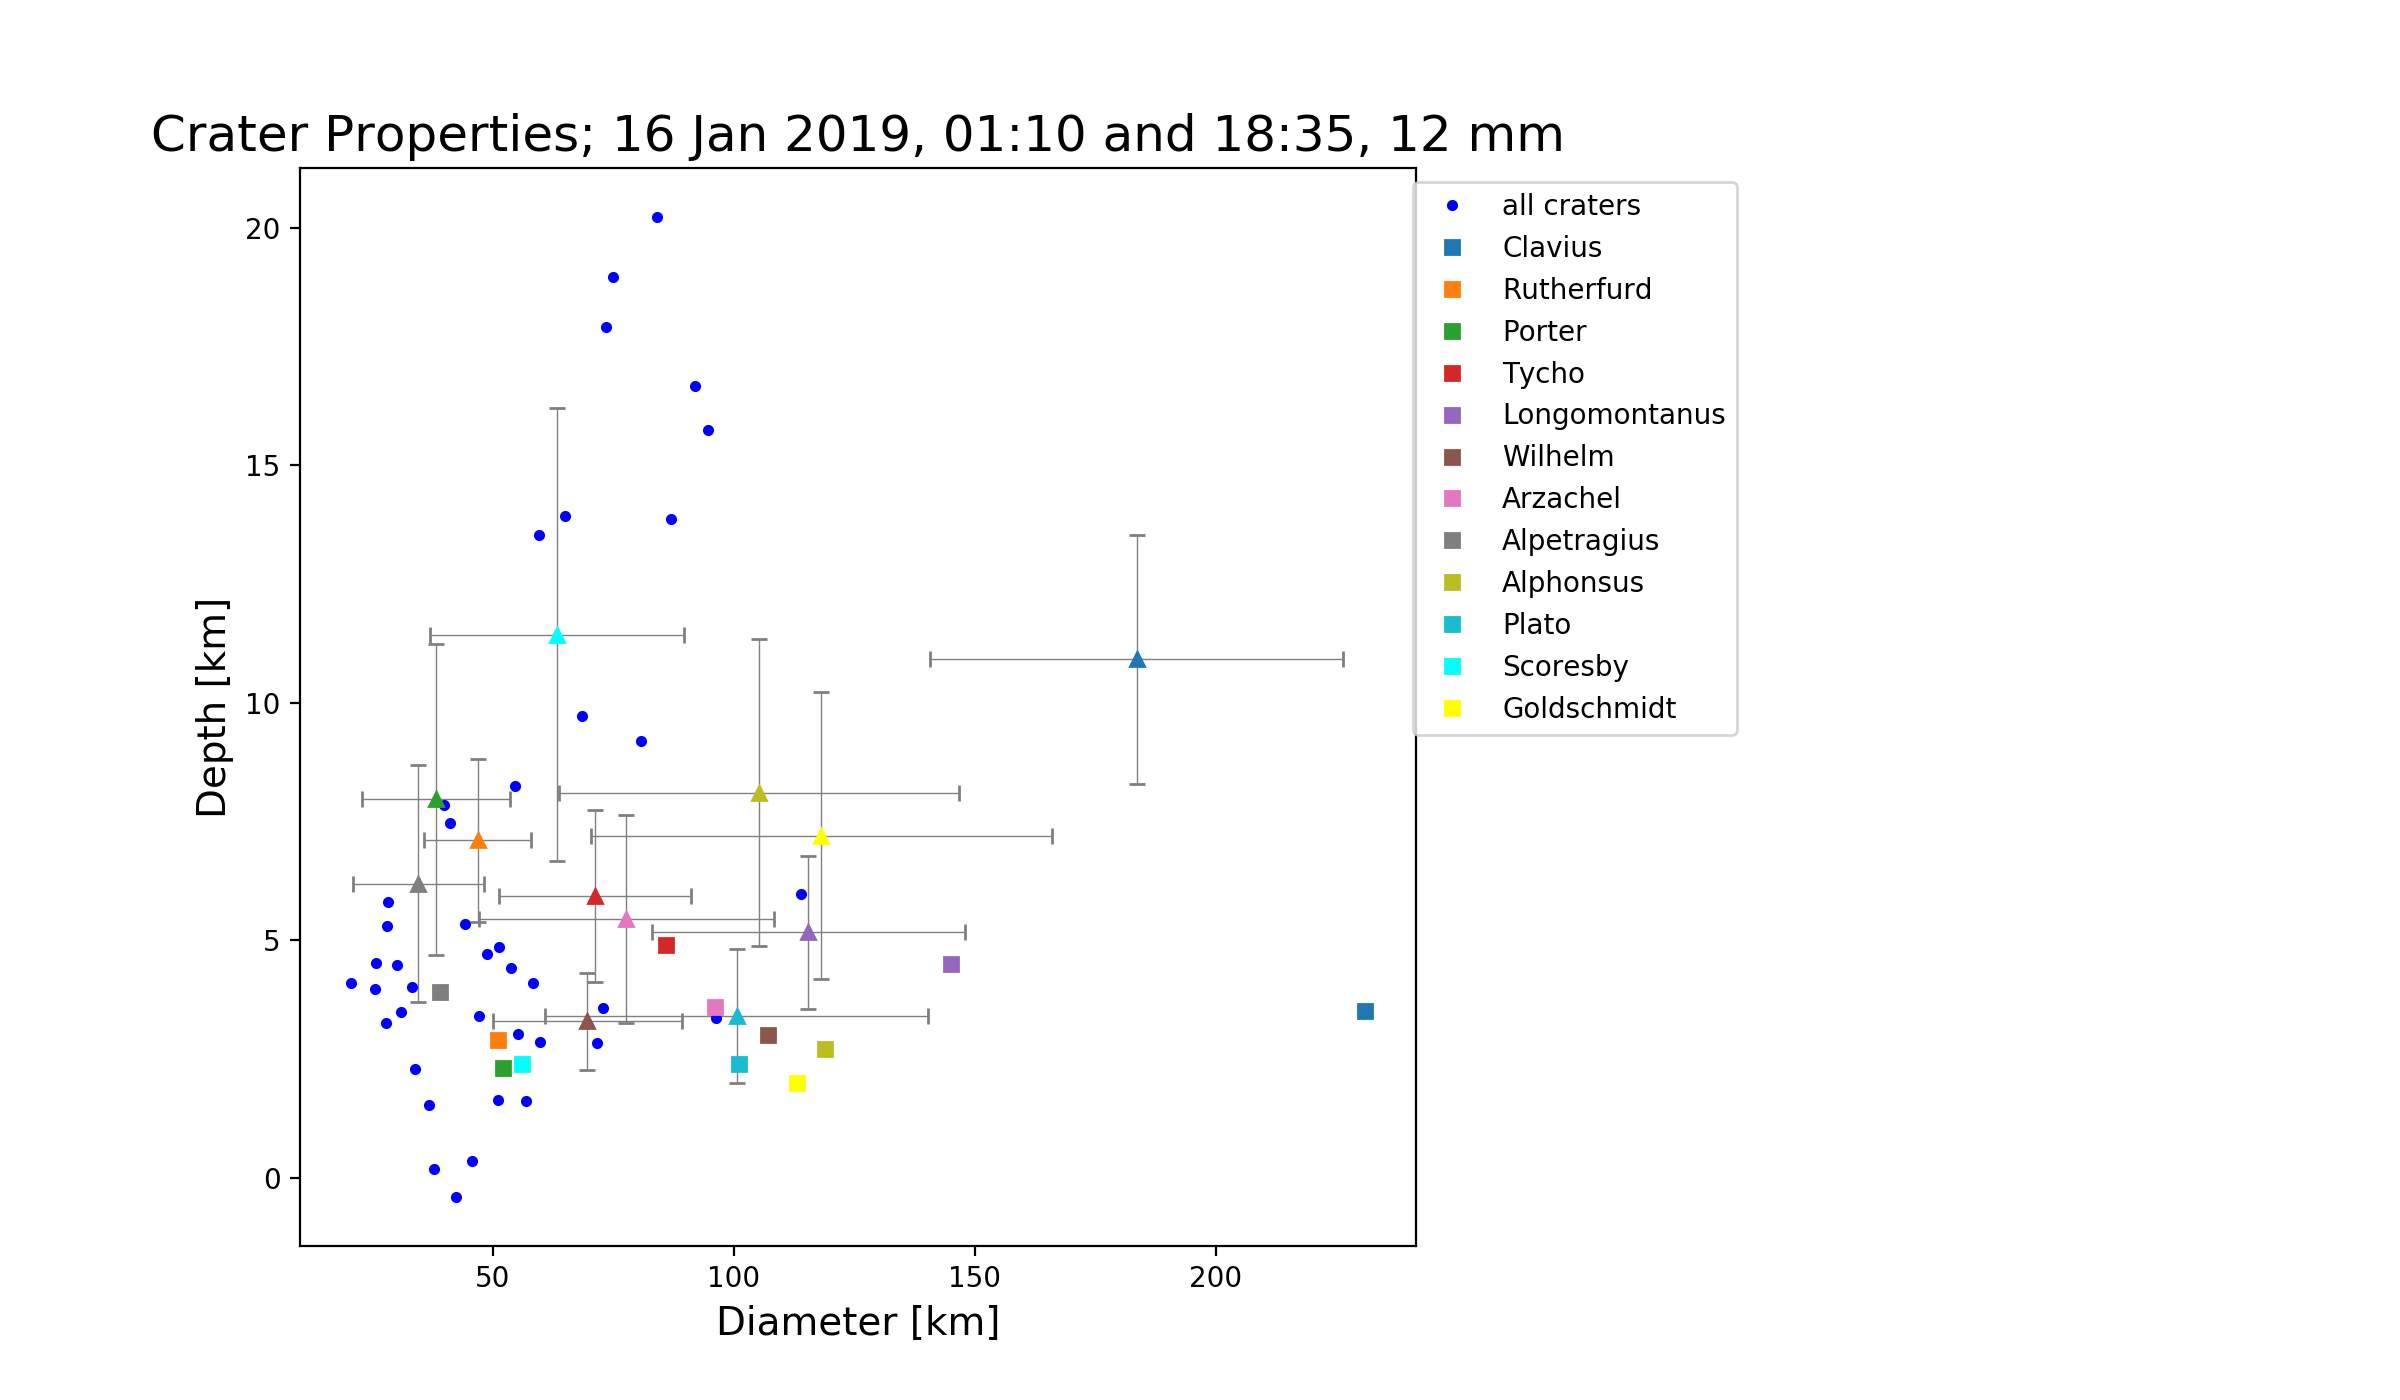

In [11]:
#plot 1
X=[]; Xerr=[]; Y=[]; Yerr=[]

indices=np.array([3, 21, 28, 4, 22, 29, 6, 10, 11, 24, 12, 25])# indices der ausgewählten krater in set 1
indices2 = np.array([0, 3, 4, 5, 10, 11, 12]) #indices der ausgewählten Krater in set2

Diameters1 = dia_0
Depths1 = depth_0
Diameters2 = Diameters
Depths2 = Depths

for i in range(len(Diameters1)):
    if i not in indices:
        X.append(Diameters1[i].n/1000)
        Xerr.append(Diameters1[i].s/1000)
        Y.append(Depths1[i].n/1000)
        Yerr.append(Depths1[i].s/1000)
for i in range(len(Diameters2)):
    if i not in indices2:
        X.append(Diameters2[i].n/1000)
        Xerr.append(Diameters2[i].s/1000)
        Y.append(Depths2[i].n/1000)
        Yerr.append(Depths2[i].s/1000)

grossX=np.array([Clavius_dia.n, Ruther_dia.n, Diameters1[6].n, Tycho_dia.n, Longo_dia.n, Wilhelm_dia.n, Diameters2[3].n, Diameters2[4].n, Diameters2[5].n, Diameters2[10].n, Diameters2[11].n, Diameters2[12].n])/1000
grossXerr=np.array([Clavius_dia.s, Ruther_dia.s, Diameters1[6].s, Tycho_dia.s, Longo_dia.s, Wilhelm_dia.s, Diameters2[3].s, Diameters2[4].s, Diameters2[5].s, Diameters2[10].s, Diameters2[11].s, Diameters2[12].s])/1000
grossY=np.array([Clavius_dep.n, Ruther_dep.n, Depths1[6].n, Tycho_dep.n, Longo_dep.n, Wilhelm_dep.n, Depths2[3].n, Depths2[4].n, Depths2[5].n, Depths2[10].n, Depths2[11].n, Depths2[12].n])/1000
grossYerr=np.array([Clavius_dep.s, Ruther_dep.s, Depths1[6].s, Tycho_dep.s, Longo_dep.s, Wilhelm_dep.s, Depths2[3].s, Depths2[4].s, Depths2[5].s, Depths2[10].s, Depths2[11].s, Depths2[12].s])/1000
       
f=plt.figure(figsize=(12,7))
ax=f.add_subplot(111)
plt.errorbar(X, Y, yerr=None, xerr=None, color='blue',marker='o', markersize=3, linestyle='', capsize=3, label='all craters')

refX=np.array([231, 51, 52, 86, 145, 107, 96, 39, 119, 101, 56, 113]) #Diameters in km der ausgewählten krater
refY=np.array([3.5, 2.9, 2.3, 4.9, 4.5, 3.0, 3.6, 3.9, 2.7, 2.4, 2.4, 2.0]) #Depth in km der ausgewählten Krater


colors=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'cyan', 'yellow']
labels=['Clavius', 'Rutherfurd', 'Porter', 'Tycho', 'Longomontanus', 'Wilhelm', 'Arzachel', 'Alpetragius', 'Alphonsus', 'Plato', 'Scoresby', 'Goldschmidt']
for n in range(12):
    ax.errorbar(grossX[n], grossY[n], yerr=grossYerr[n], xerr=grossXerr[n], color=colors[n],marker='^', markersize=5, linestyle='', elinewidth=0.5, ecolor='grey', capsize=3)#, label=labels[n])
    ax.errorbar(refX[n], refY[n], yerr=None, xerr=None, color=colors[n],marker='s', markersize=5, linestyle='', capsize=3, label=labels[n])

plt.title('Crater Properties; 16 Jan 2019, 01:10 and 18:35, 12 mm', fontsize=18)
plt.xlabel('Diameter [km]', fontsize=14)
plt.ylabel('Depth [km]', fontsize=14)
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.show()
plt.savefig('Crater_distribution_jennifer.pdf')#, additional_artists=art)#, bbox_inches='tight')
#plt.clf()